In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [3]:
df = pd.read_csv('../data/cleaned_data.csv')
df.dtypes

id                   int64
title               object
year               float64
author_name         object
author_org          object
author_id           object
n_citation         float64
doc_type            object
reference_count    float64
references          object
venue_id           float64
venue_name          object
venue_type          object
doi                 object
keyword             object
volume             float64
issue              float64
publisher           object
weight              object
indexed_keyword     object
inverted_index      object
dtype: object

# Hypothesis 4:
> There is a significant difference in citation counts across different research fields.

- Null Hypothesis (H₀): Mean citation counts are equal across research fields.
- Alternative Hypothesis (H₁): At least one research field has a different mean citation count.

> We'll be using the one-way ANOVA test as we are comparing means across multiple groups

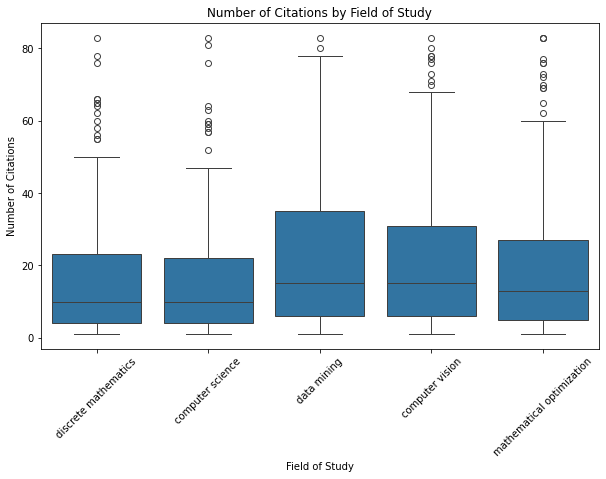

F-Statistic: 3.6356
P-value: 5.9891e-03
Reject the null hypothesis: Significant differences exist among research fields.


In [4]:
df = df[['keyword', 'n_citation']].dropna()

# Extract primary field of study
df['field_of_study'] = df['keyword'].apply(lambda x: x.split(';')[0])

# Select top 5 fields by frequency
top_fields = df['field_of_study'].value_counts().nlargest(5).index
df = df[df['field_of_study'].isin(top_fields)]

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='field_of_study', y='n_citation', data=df)
plt.title('Number of Citations by Field of Study')
plt.xlabel('Field of Study')
plt.ylabel('Number of Citations')
plt.xticks(rotation=45)
plt.show()

# Prepare data for ANOVA
groups = [group['n_citation'].values for name, group in df.groupby('field_of_study')]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: Significant differences exist among research fields.")
else:
    print("Fail to reject the null hypothesis: No significant differences among research fields.")

> At least one field differs significantly!